# 1. Загрузка и подготовка данных

Здесь будем подгружать все потребующиеся библиотеки.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats as st

Константы

In [2]:
BUDGET = 10000000000 # Сумма бюджета в рублях.
BARREL = 450 # Доход от одного барреля в рублях.
PRODUCT = 1000 * BARREL # Доход с каждой единицы продукта в рублях.
BOREHOLES = 200 # Количество скважин.
POINTS = 500 # Количество исследуемых точек.

Открываем и смотрим на данные.

In [3]:
geo_0 = pd.read_csv('/datasets/geo_data_0.csv')

In [4]:
geo_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
geo_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
geo_1 = pd.read_csv('/datasets/geo_data_1.csv')

In [7]:
geo_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [8]:
geo_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
geo_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [10]:
geo_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [11]:
geo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Данные в порядке и понятны. Посмотрим как они распределены.

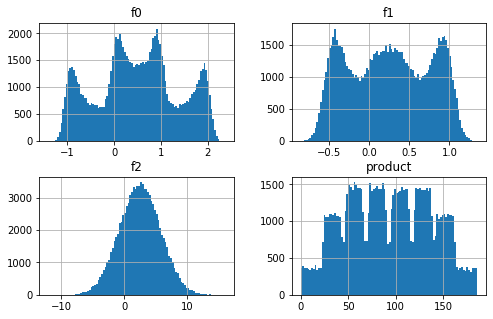

In [12]:
geo_0.hist(bins=100, figsize=(8,5));

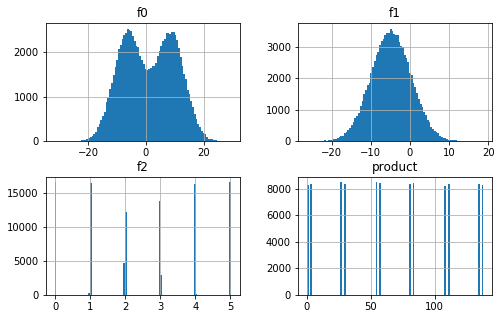

In [13]:
geo_1.hist(bins=100, figsize=(8,5));

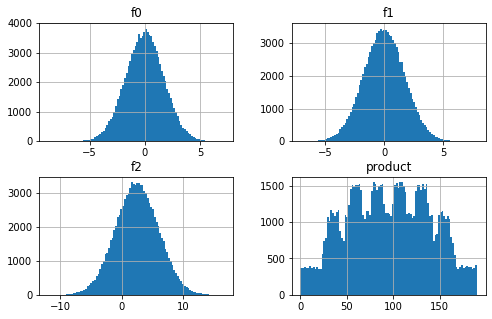

In [14]:
geo_2.hist(bins=100, figsize=(8,5));

Какие-то данные распределны нормально, какие-то нет, видимо это зависит от метода сбора информации при геологоразведке.

Колонка id нас не интересует, уберем ее из данных.

In [15]:
geo_0 = geo_0.drop('id', axis=1)

In [16]:
geo_1 = geo_1.drop('id', axis=1)

In [17]:
geo_2 = geo_2.drop('id', axis=1)

Проверяем.

In [18]:
geo_0.head()

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


# 2. Обучение и проверка модели

## 2.1. Разбиваем данные на обучающую и валидационную

Напишем функцию, которая будет делать 4 действия: разделяет выборку, создаем модель, обучает ее и делает предсказания.

In [19]:
def SCLP(data): # SCLP: S - split, C - create, L - learn, P - predict
    target = data['product'] # S - split
    features = data.drop('product', axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(
                                                                        features, target, test_size=0.25, random_state=12345)
    model = LinearRegression() # C - create
    model.fit(features_train, target_train) # L - learn
    predicted_valid = model.predict(features_valid) # P - predict
    return target_valid, predicted_valid

## 2.2. Обучаем модель и делаем предсказания на валидационной выборке

In [20]:
n = 0
for data in [geo_0, geo_1, geo_2]:
    target_valid,  predicted_valid = SCLP(data)
    mse = mean_squared_error(target_valid, predicted_valid)
    rmse = mse**0.5
    predictions_mean = pd.Series(target_valid.mean(), index=target_valid.index)
    mse_mean = mean_squared_error(target_valid, predictions_mean)
    rmse_mean = mse_mean**0.5
    print('-----------------------------------------')
    print('Геологоразведка geo_' + str(n))
    n += 1
    print('Средний запас предсказанного сырья:', predicted_valid.mean().round(2))
    print('RMSE модели:', rmse.round(2))
    print('RMSE средней модели:', rmse_mean.round(2))
    print('Средний запас реального сырья:', target_valid.mean().round(2))

-----------------------------------------
Геологоразведка geo_0
Средний запас предсказанного сырья: 92.59
RMSE модели: 37.58
RMSE средней модели: 44.29
Средний запас реального сырья: 92.08
-----------------------------------------
Геологоразведка geo_1
Средний запас предсказанного сырья: 68.73
RMSE модели: 0.89
RMSE средней модели: 46.02
Средний запас реального сырья: 68.72
-----------------------------------------
Геологоразведка geo_2
Средний запас предсказанного сырья: 94.97
RMSE модели: 40.03
RMSE средней модели: 44.9
Средний запас реального сырья: 94.88


## 2.3. Сохраняем предсказания и правильные ответы на валидационной выборке

Предсказания сохранены в переменной вида predicted_0/1/2_valid, ответы в переменной вида target_0/1/2_valid соответственно номеру геологоразведки.

## 2.4. Печатаем на экране средний запас предсказанного сырья и RMSE модели

Сделано в пункте 2.2.

## 2.5 Анализируем результаты

Из трех моделей только модель с данными из геологоразведки geo_1 получилась с очень маленькой ошибкой RMSE, однако содержит предсказания с самым низким запасом сырья.   
Так же мы проверили модели на адекватность свранив RMSE моделей с RMSE модели со средними значениями.

# 3. Подготовка к расчёту прибыли

## 3.1. Сохраняем все ключевые значения для расчетов в отдельных переменных

Костанты сохранены в самом начале.

## 3.2. Рассчитываем достаточный объем сырья для безубыточной разработки новой скважины

Рассчитываем достаточный объём сырья для безубыточной разработки новой скважины.

In [21]:
BUDGET / BOREHOLES / PRODUCT

111.11111111111111

Сравниваем полученный объём сырья со средним запасом в каждом регионе, выведено в пункте 2.2.

Везде меньше достаточного объема сырья.

## Выводы   
Мы подсчитали, что минимальный объем сырья для старта разработкиновой скважины 111,11 ед. Сравнивая со средними запасами в каждом регионе видим, что везде меньше данного значения.

# 4. Пишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

Пишем функцию.

In [22]:
def revenue(target, probabilities, count):
    probs_sorted = pd.Series(probabilities).sort_values(ascending=False)
    target.reset_index(drop=True, inplace=True)
    selected = target[probs_sorted.index][:count]
    return PRODUCT * selected.sum() - BUDGET

Считаем прибыль полученного объема для каждого региона.

In [23]:
n = 0
for data in [geo_0, geo_1, geo_2]:
    target_valid,  predicted_valid = SCLP(data)
    print('--------------------------------------')
    print('Геологоразведка geo_' + str(n))   
    n += 1
    print('Прибыль полученного объема:', int(revenue(target_valid, predicted_valid, BOREHOLES)))

--------------------------------------
Геологоразведка geo_0
Прибыль полученного объема: 3320826043
--------------------------------------
Геологоразведка geo_1
Прибыль полученного объема: 2415086696
--------------------------------------
Геологоразведка geo_2
Прибыль полученного объема: 2710349963


# 5 Считаем риски и прибыль для каждого региона

In [24]:
state = np.random.RandomState(12345)
for data in [geo_0, geo_1, geo_2]:
    values = []
    loss = 0
    n = 0
    target_valid,  predicted_valid = SCLP(data) 
    target_valid.reset_index(drop=True, inplace=True)
    for i in range(1000):       
        target_subsample = target_valid.sample(n=POINTS, replace=True, random_state=state)
        probs_subsample = predicted_valid[target_subsample.index]
        values.append(revenue(target_subsample, probs_subsample, BOREHOLES))
    print('-----------------------------------------')
    print('Геологоразведка geo_' + str(n))
    n += 1
    loss = sum(pd.Series(values) < 0) / 1000 * 100
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean = values.mean()
    confidence_interval = st.t.interval(0.95, len(values)-1, mean, values.sem())
    print("Средняя прибыль, руб.:", int(mean))
    print("Риск убытков, %:", round(loss, 2))
    print("Доверительный интервал к выручке:")
    print("2,5%-квантиль, руб.:", int(lower))
    print("97,5%-квантиль, руб.:", int(upper))
    print('Доверительный интервал к средней выручке:', confidence_interval)

-----------------------------------------
Геологоразведка geo_0
Средняя прибыль, руб.: 396164984
Риск убытков, %: 6.9
Доверительный интервал к выручке:
2,5%-квантиль, руб.: -111215545
97,5%-квантиль, руб.: 909766941
Доверительный интервал к средней выручке: (379620315.1479725, 412709654.45676965)
-----------------------------------------
Геологоразведка geo_0
Средняя прибыль, руб.: 461155817
Риск убытков, %: 0.7
Доверительный интервал к выручке:
2,5%-квантиль, руб.: 78050810
97,5%-квантиль, руб.: 862952060
Доверительный интервал к средней выручке: (448828936.4815786, 473482698.0729009)
-----------------------------------------
Геологоразведка geo_0
Средняя прибыль, руб.: 392950475
Риск убытков, %: 6.5
Доверительный интервал к выручке:
2,5%-квантиль, руб.: -112227625
97,5%-квантиль, руб.: 934562914
Доверительный интервал к средней выручке: (376164225.32954943, 409736725.0116595)


# Выводы   
Все регионы получились в целом прибыльными, однако риски убытка рызные. Только один регион с вероятностью убытков меньше 2.5% - это регион geo_1 с показателем 1.5%, его и предлагается взять для разработки скважин.